## Step 1: Load Iris Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

## Step 2: Train-Test Data Split

In [3]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=0)

## Step 3: Build the Network

In [4]:
class IrisNetwork(nn.Module):
    def __init__(self, features=4, hidden_nodes=50):
        super(IrisNetwork, self).__init__()
        self.layer1 = nn.Linear(features, hidden_nodes)
        self.layer2 = nn.Linear(hidden_nodes, hidden_nodes)
        self.layer3 = nn.Linear(hidden_nodes, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))  # Activation for layer1: ReLU
        x = F.relu(self.layer2(x))  # Activation for layer2: ReLU
        x = F.softmax(self.layer3(x), dim=1)  # Activation for layer3: softmax
        return x

In [5]:
model = IrisNetwork(hidden_nodes=20)
print(model)

IrisNetwork(
  (layer1): Linear(in_features=4, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=20, bias=True)
  (layer3): Linear(in_features=20, out_features=3, bias=True)
)


## Step 4: Train the Network

In [6]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

In [7]:
X_train_t = torch.FloatTensor(X_train)
y_train_t = torch.LongTensor(y_train)  # y's are long?

In [8]:
train_accuracy = []
train_loss = []

for i in range(500):
    y_hat = model(X_train_t)  # prediction is a vector whose value is between 0 and 1
    loss = loss_func(y_hat, y_train_t)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    # record data
    y_hat_np = y_hat.detach().numpy()
    y_hat_class = np.argmax(y_hat_np, axis=1)  # Use index of the max value as prediction
    accuracy = np.sum(y_train==y_hat_class) / len(y_train)
    train_accuracy.append(accuracy)
    train_loss.append(loss.item())

## Step 5: Draw Training Loss and Accuracy

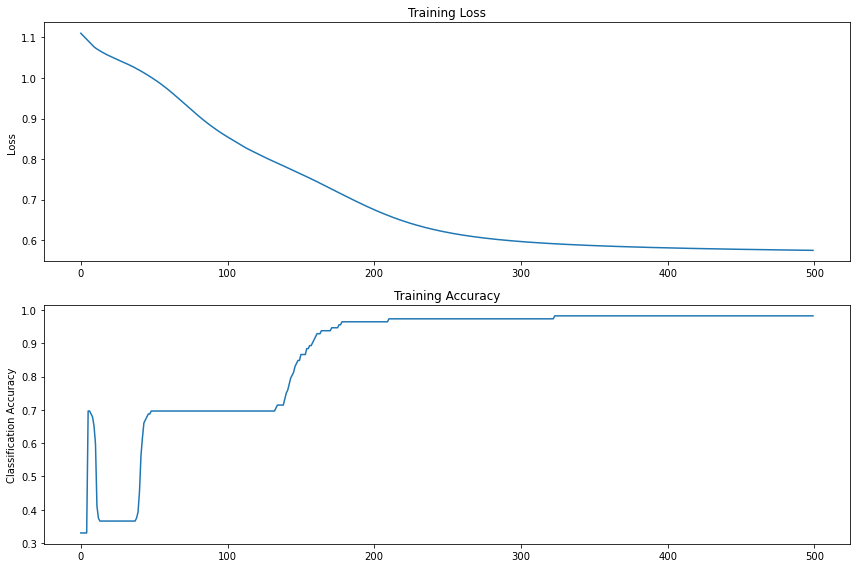

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(train_loss)
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss')

ax[1].plot(train_accuracy)
ax[1].set_ylabel('Classification Accuracy')
ax[1].set_title('Training Accuracy')

plt.tight_layout()
plt.show()

## Step 6: Run Against Test Dataset

In [10]:
X_test_t = torch.FloatTensor(X_test)
y_test_hat = model(X_test_t)
y_test_hat_np = y_test_hat.detach().numpy()
y_test_hat_class = np.argmax(y_test_hat_np, axis=1)
accuracy = np.sum(y_test==y_test_hat_class) / len(y_test)
print(f"Test Accuray: {accuracy * 100}%")

Test Accuray: 97.36842105263158%
